### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

### Data Description:
### Murder -- Muder rates in different places of United States
### Assualt- Assualt rate in different places of United States
### UrbanPop - urban population in different places of United States
### Rape - Rape rate in different places of United State

### 1. Import libraries required

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### 2.Load dataset

In [4]:
crime_data=pd.read_csv('crime_data.csv')   # Read Data
crime_data.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime_data.rename({'Unnamed: 0' : 'State'},axis=1, inplace=True) # rename column
crime_data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
def Nomalize(data):                                   ## Define function to normalize numerical data
    x = (data - data.min())/(data.max() - data.min())
    return x

In [7]:
normCrimeData = Nomalize(crime_data.iloc[:,1:])       ## Apply normalization function on dataframe
normCrimeData.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


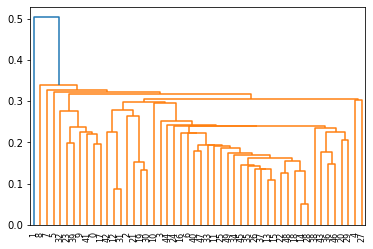

In [8]:
Dendrogram = sch.dendrogram(sch.linkage(normCrimeData,method='single')) ## create dendrogram using sigle linkage

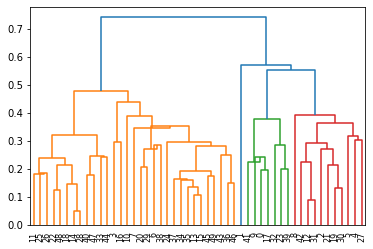

In [9]:
Dendrogram = sch.dendrogram(sch.linkage(normCrimeData,method='centroid')) ## create dendrogram using Centroid linkage

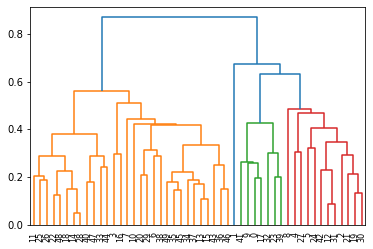

In [11]:
Dendrogram = sch.dendrogram(sch.linkage(normCrimeData,method='average')) ## create dendrogram using Average linkage

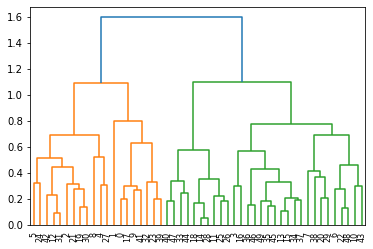

In [12]:
## create dendrogram using Complete linkage
Dendrogram = sch.dendrogram(sch.linkage(normCrimeData,method='complete')) # more or less equal representation

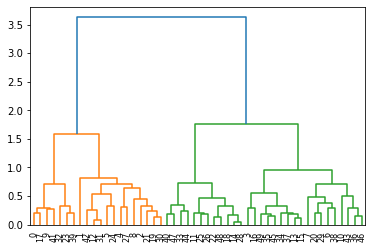

In [13]:
## create dendrogram using ward method
Dendrogram = sch.dendrogram(sch.linkage(normCrimeData,method='ward')) # same representation as complete

In [14]:
h_clusters = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='complete') # creating class instance

In [20]:
hcs = h_clusters.fit_predict(normCrimeData)         ## Predicting clusters id for each record
h_clust_id = pd.DataFrame(hcs, columns=['h_clust_id'])
h_clust_id.head()

,h_clust_id
0,0
1,0
2,3
3,1
4,3


In [21]:
mcrime_data = crime_data.copy(deep=True)
mcrime_data = pd.concat([h_clust_id,mcrime_data],axis=1)       ## creating clusterid column in dataframe
mcrime_data

,h_clust_id,State,Murder,Assault,UrbanPop,Rape
0,0,Alabama,13.2,236,58,21.2
1,0,Alaska,10.0,263,48,44.5
2,3,Arizona,8.1,294,80,31.0
3,1,Arkansas,8.8,190,50,19.5
4,3,California,9.0,276,91,40.6
5,3,Colorado,7.9,204,78,38.7
6,1,Connecticut,3.3,110,77,11.1
7,1,Delaware,5.9,238,72,15.8
8,3,Florida,15.4,335,80,31.9
9,0,Georgia,17.4,211,60,25.8


In [17]:
mcrime_data.groupby(mcrime_data['h_clust_id']).mean().sort_values(by='Murder') # Group and sort on clusters

,Murder,Assault,UrbanPop,Rape
h_clust_id,,,,
2,3.180000,78.700000,49.300000,11.6300
1,5.715000,132.300000,70.800000,18.1000
3,10.883333,256.916667,78.333333,32.2500
0,14.087500,252.750000,53.500000,24.5375


In [22]:
mcrime_data.groupby(['h_clust_id']).median().sort_values(by='Murder')       ## Group and sort on clusters

,Murder,Assault,UrbanPop,Rape
h_clust_id,,,,
2,2.40,82.0,52.0,11.25
1,5.95,132.5,70.0,18.40
3,11.20,254.5,80.0,31.45
0,13.80,254.0,53.0,22.35


### Inference: Cluster 2 has the loweest crime rate among all the clusters, also this is the lowest urban population

### Crime rate has direct releationship with urban population. However cluster 0 has highest crime rate in all categories dispite having the low urban population

### All types of Crimes show a positive correlation

## Clustering using KMEANS

In [23]:
crime_data.head(3)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


In [24]:
# Standerdization - import standardScaler from sklern
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_data = scaler.fit_transform(crime_data.iloc[:,1:])

### Using Elbow method for finding optimum clusters

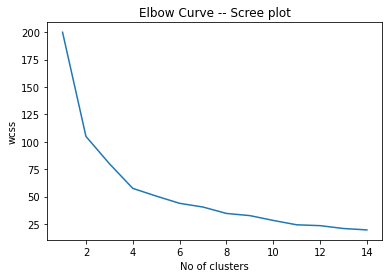

In [27]:

wcss = []                                     ## Calculating TWSS for range of no of clusters fo Elbow curve

for i in range(1,15):
    k = KMeans(n_clusters=i,random_state=0)   ### optimum clusters look like 4 from the elbow curve`
    k.fit(scaled_crime_data)
    wcss.append(k.inertia_)
plt.plot(range(1,15),wcss)
plt.title('Elbow Curve -- Scree plot')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [28]:
k_clust = KMeans(n_clusters=4, random_state=0)   ## initiation KMean class and fiting it on the data
k_clust.fit(scaled_crime_data)

KMeans(n_clusters=4, random_state=0)

In [29]:
km_clust = pd.DataFrame(k_clust.labels_,columns=['k_clust_id'])                ## Extracting clusters ids for each record
km_clust.head()

,k_clust_id
0,3
1,1
2,1
3,3
4,1


In [30]:
mcrime_data = pd.concat([km_clust,mcrime_data],axis=1)

# mcrime_data['k_clust_id'] = k_clust.labels_        
## adding cluster ids in the data frame and applying sort function.

mcrime_data.sort_values(by='k_clust_id')

,k_clust_id,h_clust_id,State,Murder,Assault,UrbanPop,Rape
49,0,1,Wyoming,6.8,161,60,15.6
29,0,1,New Jersey,7.4,159,89,18.8
15,0,1,Kansas,6.0,115,66,18.0
13,0,1,Indiana,7.2,113,65,21.0
34,0,1,Ohio,7.3,120,75,21.4
35,0,1,Oklahoma,6.6,151,68,20.0
36,0,1,Oregon,4.9,159,67,29.3
37,0,1,Pennsylvania,6.3,106,72,14.9
10,0,1,Hawaii,5.3,46,83,20.2
6,0,1,Connecticut,3.3,110,77,11.1


In [31]:
mcrime_data.groupby('k_clust_id').mean().sort_values(by='Murder') ## applying the groupby function based on kClustId - Mean

,h_clust_id,Murder,Assault,UrbanPop,Rape
k_clust_id,,,,,
2,1.769231,3.600000,78.538462,52.076923,12.176923
0,1.000000,5.656250,138.875000,73.875000,18.781250
1,2.769231,10.815385,257.384615,76.000000,33.192308
3,0.125000,13.937500,243.625000,53.750000,21.412500


In [32]:
mcrime_data.groupby('k_clust_id').median().sort_values(by='Murder')  ## applying the groupby function based on kClustId - Median

,h_clust_id,Murder,Assault,UrbanPop,Rape
k_clust_id,,,,,
2,2.0,2.60,81.0,53.0,11.3
0,1.0,5.95,147.0,72.5,19.4
1,3.0,11.10,255.0,80.0,31.9
3,0.0,13.80,242.5,54.0,21.7


### Inference: more or less both methods are giving the same inferences, baring the change of ids.

### kClustId - 3 or hi_Clust_Id 2 has the loweest crime rate among all the clusters, also this is the lowest urban population

### Crime rate has direct releationship with urbanPopulation. However, kClustId 1 / hi_Clust_id 0 has highest crime rate in all categories dispite having the low urban population

### All types of Crimes show a positive correlation menaing one high means other high

## DBSCAN Clustering

In [34]:
crime_data.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [35]:
crime_data.drop('State',axis=1,inplace=True) # Drop state for creating an array

In [36]:
array = crime_data.values                    # creating an array out of dataframe for only numeric values.
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [37]:
scaler = StandardScaler().fit(array)            ## creation scaler class instance
x = scaler.transform(array)                     ## fitting it on the array
x                                               ## diplaying the standardized array

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [38]:
scaler1 = StandardScaler()                       ## both Fit_transform and Fit and Transform give you the same result.
y = scaler1.fit_transform(array)
y

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [39]:
db = DBSCAN(eps=1.2,min_samples=6)      ## creating DBSCAN class --- testing it with various epsolon and minpoints for 
db.fit(x)                               ## for optimum clustring calculations... after various combinations eps 1.2 and 
print(db.labels_)                       ## min_samples of 5 looks optimum, with the highes score of .386

print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(x, db.labels_))

[-1 -1 -1  0 -1 -1  0  0 -1 -1  0  0 -1  0  0  0  0 -1  0 -1  0 -1  0 -1
  0  0  0 -1  0  0 -1 -1 -1  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0
  0  0]
Silhouette Coefficient: 0.386


In [40]:
db.get_params()                        ## checking the parameters of db instance

{'algorithm': 'auto',
 'eps': 1.2,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 6,
 'n_jobs': None,
 'p': None}

In [41]:
d_clust = pd.DataFrame(db.labels_,columns=['d_clust_id'])     # creating a dataframe out of lables
d_clust.head()

,d_clust_id
0,-1
1,-1
2,-1
3,0
4,-1


In [42]:
mcrime_data = pd.concat([d_clust,mcrime_data],axis=1)       ## adding the db clusters to our master crime dataframe
mcrime_data

,d_clust_id,k_clust_id,h_clust_id,State,Murder,Assault,UrbanPop,Rape
0,-1,3,0,Alabama,13.2,236,58,21.2
1,-1,1,0,Alaska,10.0,263,48,44.5
2,-1,1,3,Arizona,8.1,294,80,31.0
3,0,3,1,Arkansas,8.8,190,50,19.5
4,-1,1,3,California,9.0,276,91,40.6
5,-1,1,3,Colorado,7.9,204,78,38.7
6,0,0,1,Connecticut,3.3,110,77,11.1
7,0,0,1,Delaware,5.9,238,72,15.8
8,-1,1,3,Florida,15.4,335,80,31.9
9,-1,3,0,Georgia,17.4,211,60,25.8


In [43]:
mcrime_data.sort_values(by='d_clust_id')                 # sorting by DB clust id

,d_clust_id,k_clust_id,h_clust_id,State,Murder,Assault,UrbanPop,Rape
0,-1,3,0,Alabama,13.2,236,58,21.2
32,-1,3,0,North Carolina,13.0,337,45,16.1
27,-1,1,3,Nevada,12.2,252,81,46.0
23,-1,3,0,Mississippi,16.1,259,44,17.1
21,-1,1,3,Michigan,12.1,255,74,35.1
19,-1,1,3,Maryland,11.3,300,67,27.8
17,-1,3,0,Louisiana,15.4,249,66,22.2
39,-1,3,0,South Carolina,14.4,279,48,22.5
31,-1,1,3,New York,11.1,254,86,26.1
41,-1,3,0,Tennessee,13.2,188,59,26.9


In [44]:
mcrime_data.groupby('d_clust_id').median().sort_values(by='Murder') ## grouping by db clust id

,k_clust_id,h_clust_id,Murder,Assault,UrbanPop,Rape
d_clust_id,,,,,,
0,0.5,1.0,5.10,114.0,66.0,16.30
-1,1.0,3.0,12.15,257.0,68.5,27.35


In [45]:
mcrime_data.groupby('k_clust_id').median().sort_values(by='Murder')  ## grouping by k Clust id

,d_clust_id,h_clust_id,Murder,Assault,UrbanPop,Rape
k_clust_id,,,,,,
2,0.0,2.0,2.60,81.0,53.0,11.3
0,0.0,1.0,5.95,147.0,72.5,19.4
1,-1.0,3.0,11.10,255.0,80.0,31.9
3,-1.0,0.0,13.80,242.5,54.0,21.7


In [46]:
mcrime_data.groupby('h_clust_id').median().sort_values(by='Murder')    ## grouping by h Clust id

,d_clust_id,k_clust_id,Murder,Assault,UrbanPop,Rape
h_clust_id,,,,,,
2,0.0,2,2.40,82.0,52.0,11.25
1,0.0,0,5.95,132.5,70.0,18.40
3,-1.0,1,11.20,254.5,80.0,31.45
0,-1.0,3,13.80,254.0,53.0,22.35


### Dbscan dose not work properly on smaller datasets. it has only divided the database in two groups one outlier and other valid group.

### While kmeans and Hirarchical clusters have given same results with mean and median being very smilar to distinct groups.

### There seems to be positive correlation in all types of crimes. one being higher means other is also higher.

### Urban population seems to have an impact on the crime rate barring one cluster where crime rate is high dispite the Urban population being low.

### As such both kmeans and Hirarchical clustering methods have predicted one cluster with low crime rate.